# **IMPORTING THE LIBRARIES**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **LOADING THE DATASET**

In [43]:
amazon_prime = pd.read_csv("/content/prime.csv")
amazon_prime.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


***Information about the dataset***

In [44]:
print("Database dimension  :",amazon_prime.shape)
print("Database size       :",amazon_prime.size)
amazon_prime.info()


Database dimension  : (8807, 12)
Database size       : 105684
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


***Printing the null value distribution***

In [45]:
nullvalue_percentage = pd.DataFrame((amazon_prime.isnull().sum())*100/amazon_prime.shape[0]).reset_index()
nullvalue_percentage.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(amazon_prime.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'No. of Null Values']

null_value_table = pd.merge(null_value, nullvalue_percentage, on='Column Name')
null_value_table
  

,Column Name,No. of Null Values,Null Values Percentage
0,show_id,0,0.000000
1,type,0,0.000000
2,title,0,0.000000
3,director,2634,29.908028
4,cast,825,9.367549
5,country,831,9.435676
6,date_added,10,0.113546
7,release_year,0,0.000000
8,rating,4,0.045418
9,duration,3,0.034064


# **DATA CLEANING AND PREPROCESSING**

***Listing the columns in the dataset***

In [46]:
columns = list(amazon_prime.columns)
columns

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [47]:
print("Column datatypes: ")
print(amazon_prime.dtypes)

Column datatypes: 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


***Checking for the unique rating names***

In [48]:
amazon_prime['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

***Replacing the incorrect rating names***

In [49]:
amazon_prime['rating'].replace('74 min', 'TV-MA', inplace=True)
amazon_prime['rating'].replace('84 min', 'TV-MA', inplace=True)
amazon_prime['rating'].replace('66 min', 'TV-MA', inplace=True)

In [50]:
amazon_prime['rating'].replace(np.nan, 'TV-MA',inplace  = True)

***Renaming rating values for better understanding***

In [51]:
amazon_prime['rating'].replace('PG-13','Teens above age 12',inplace=True)
amazon_prime['rating'].replace('TV-MA','Adults',inplace=True)
amazon_prime['rating'].replace('PG','Kids with parental guidance',inplace=True)
amazon_prime['rating'].replace('TV-14','Teens above age 14',inplace=True)
amazon_prime['rating'].replace('TV-PG','Kids with parental guidance',inplace=True)
amazon_prime['rating'].replace('TV-Y','Kids',inplace=True)
amazon_prime['rating'].replace('TV-Y7','Kids above age 7',inplace=True)
amazon_prime['rating'].replace('R','Adults',inplace=True)
amazon_prime['rating'].replace('TV-G','Kids',inplace=True)
amazon_prime['rating'].replace('G','Kids',inplace=True)
amazon_prime['rating'].replace('NC-17','Adults',inplace=True)
amazon_prime['rating'].replace('NR','NR',inplace=True)
amazon_prime['rating'].replace('TV-Y7-FV','Kids above age 7',inplace=True)
amazon_prime['rating'].replace('UR','UR',inplace=True)

amazon_prime['rating'].unique()

array(['Teens above age 12', 'Adults', 'Kids with parental guidance',
       'Teens above age 14', 'Kids', 'Kids above age 7', 'NR', 'UR'],
      dtype=object)

***Replacing the null values in each column***

In [52]:
amazon_prime['country'].replace(np.nan, 'United States',inplace  = True) #United states because its the most common field in that column
amazon_prime['cast'].replace(np.nan, 'No data',inplace  = True)
amazon_prime['director'].replace(np.nan, 'No data',inplace  = True)
amazon_prime.dropna(inplace=True)
amazon_prime.drop_duplicates(inplace=True)

***Adding a column month for better analysis***

In [53]:
amazon_prime['month'] = pd.DatetimeIndex(amazon_prime['date_added']).month

***Converting the datatype of year to int***

In [54]:
amazon_prime['release_year'] = amazon_prime['release_year'].astype('int')
amazon_prime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
 12  month         8794 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 961.8+ KB


In [55]:
def to_minutes(series): 
    return series.split()[0]
    
        
amazon_prime['duration'] = amazon_prime.duration.apply(lambda x: to_minutes(x))

***Converting the datatype of duration to int***

In [56]:
amazon_prime['duration'] = amazon_prime.duration.astype('int')

Now the data cleaning is done and its ready for analysis.

# **EXPLORATORY DATA ANALYSIS & VISUALIZATION**

***Displaying the total content***

In [57]:
total_content = amazon_prime['show_id'].count().sum()
print("Total content in the amazon Prime is ::")
print(total_content)



Total content in the amazon Prime is ::
8794


***Classifying and Visualizing the movies and tv shows***

Text(0.5, 0, '')

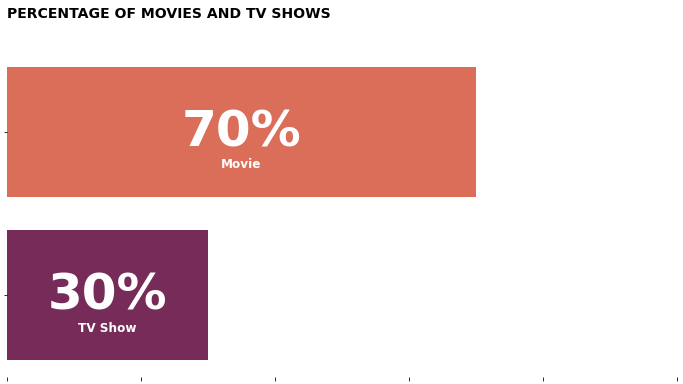

In [58]:
types_df = amazon_prime.groupby(["type"]).size().reset_index(name="counts")
types_df["percent"] = round(types_df["counts"] / sum(types_df["counts"]), 2) * 100
plt.figure(figsize=(12, 6))
g = sns.barplot(x="percent", y="type", palette="rocket_r", data=types_df, orient="h")

g.text(
    0,
    -0.7,
    "PERCENTAGE OF MOVIES AND TV SHOWS",
    fontsize=14,
    fontweight="bold",
    color="black",
)

col = "percent"
for i in range(2):
    g.annotate(
        f"{int(types_df[col][i])}%",
        xy=(types_df[col][i] / 2, i),
        ha="center",
        va="center",
        fontsize=50,
        fontweight="bold",
        color="white",
    )
    g.annotate(
        "Movie" if i == 0 else "TV Show",
        xy=(types_df[col][i] / 2, i + 0.2),
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="white",
    )

for i in ["top", "left", "right", "bottom"]:
    g.spines[i].set_visible(False)

g.set_xlim(0, 100)
g.set(xticklabels=[], yticklabels=[])
plt.ylabel("")
plt.xlabel("")

***Bar plot to visualize the amazon prime content in each country*** and
***Stacked bar plot to visualize the movies/tv shows in each country***





In [59]:
df_country = amazon_prime[['show_id', 'title','type', 'country' ]]
df_country = (df_country.drop('country', axis=1)
             .join
             (
             df_country.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')           
             ))

In [60]:
country_content = df_country[["title", "country"]]
country_content = country_content.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(10)
country_content = country_content.rename(columns = {"title": "movies_count",})

 
fig1 = px.bar(country_content, x='country', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Top 10 countries with Amazon Prime Content ')


df_country_viz = df_country[["title", "country"]]
df_country_viz = df_country_viz.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(10)

df_country_viz1 = df_country[["title", "type", "country"]]
df_country_viz1 = df_country_viz1.groupby(['country', 'type'])["title"].count().reset_index().sort_values('title', ascending= False)
df_country_viz1 = df_country_viz1.rename(columns = {"title": "movies_count",})

final1 = df_country_viz.merge(df_country_viz1, how = 'left', left_on = 'country', right_on = 'country')
final1['percentage'] = (final1['movies_count']/final1['title'])*100
final1['percentage'] = final1['percentage'].round(1)
final1['percent_string'] = final1['percentage'].astype(str)+ '%'


fig2 = px.bar(final1, x='country', y='percentage', color = 'type',
       title='Top 10 countries with Movie/TV show split ')

In [61]:
fig = go.Figure()
fig.add_trace(
    
go.Bar(x= country_content['country'], y= country_content['movies_count'], marker_color = 'Maroon',
           text = country_content['movies_count'], textposition='auto'))

fig.update_layout(title_text = "TOP 10 COUNTRIES WITH AMAZON PRIME CONTENT"
                  , yaxis=dict(title='Movies/TV Shows Count'))
fig.show()

final_movie = final1.query("type == 'Movie'")
final_show = final1.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Bar(
    x=  final_movie['country'],
    y= final_movie['percentage'],
    showlegend=True,
    text = final_movie['percent_string'], 
    textposition='auto',
    name='Movie',
    marker_color='Maroon'    
    
))
fig.add_trace(go.Bar(
    x= final_show['country'],
    y= final_show['percentage'],
    showlegend=True,
    text = final_show['percent_string'], 
    textposition='auto',
    name='TV Show',
    marker_color='Grey' 
))

fig.update_layout(barmode='stack', title_text = 'TOP 10 COUNTRIES WITH MOVIES/TV SHOWS SPLIT UP '
                  , yaxis=dict(title='% Movies/TV Shows Count'))
fig.show()

***Visualizing the yearly trend of releasing movies and TV shows***

In [62]:
#df_4 = df.query("type == 'Movie'")
df_4 = amazon_prime.query("release_year >= 2008")
df_4 = df_4.groupby (["type","release_year"])["show_id" ].count().reset_index()
df_4_movie = df_4.query ("type == 'Movie'")
df_4_show = df_4.query("type =='TV Show'")
fig = go. Figure()
fig.add_trace(go.Scatter(
    x= df_4_movie['release_year'],
    y=df_4_movie['show_id'],
    name = 'Movie',
    marker_color = 'Maroon'))

fig.add_trace(go.Scatter(
    x= df_4_show['release_year'],
    y=df_4_show['show_id'],
    name = 'Show',
    marker_color = 'Grey'))
 
fig.update_traces(mode ='lines+markers')
fig.update_layout(title_text = 'Movies/TV shows released yearly trend')
fig.show()


***Function that returns a graph depicting the months in each year trend of movies and show released***

In [63]:
def trend_yearwise(year):
    
    title = ('Movies/TV Show release Month Trend for year {2008}' )
    df_6 = amazon_prime.query("release_year == @year")
    df_6 = df_6.groupby(["type","month"])["show_id"].count().reset_index()
    df_6_movie = df_6.query("type == 'Movie'")
    df_6_show = df_6.query("type == 'TV Show'")
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x=  df_6_movie['month'],
    y= df_6_movie['show_id'],
    showlegend=True,
    text = df_6_movie['show_id'], 
    name='Movie',
    marker_color='Maroon'    

    ))
    fig.add_trace(go.Scatter(
    x=  df_6_show['month'],
    y= df_6_show['show_id'],
    showlegend=True,
    text = df_6_show['show_id'], 
    name='TV Show',
    marker_color='Grey' 
    ))

    fig.update_traces( mode='lines+markers')
    fig.update_layout(title_text =  title )
    fig.show()

trend_yearwise(2018) #change the year that is needed

***Visualizing the maximum content based on ratings***

In [64]:
df_2 = amazon_prime.query("type == 'Movie'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
px.bar(df_2, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='UPLOADED MOVIES COUNT FOR EACH RATINGS ')

In [65]:
df_3 = amazon_prime.query("type == 'TV Show'")
df_3 = df_3[["title", "rating"]]
df_3 = df_3.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
df_3 = df_3.rename(columns = {"title": "movies_count"})
px.bar(df_3, x='rating', y='movies_count', color_discrete_sequence=['grey'],
       title='UPLOADED TV SHOWS COUNT FOR EACH RATING')

***Striping of listed_in columns is done for deriving the genre***

In [66]:
top_listed_genre = amazon_prime.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_listed_genre

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19300, dtype: object

In [67]:
#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_genre = amazon_prime[['show_id', 'title','type', 'listed_in' ]]
df_genre = (df_genre.drop('listed_in', axis=1)
             .join
             (
             df_genre.listed_in
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('listed_in')           
             ))

In [68]:
df_genre_viz = df_genre[["title", "type", "listed_in"]]
df_genre_viz = df_genre_viz.groupby(['listed_in', 'type'])["title"].count().reset_index().sort_values('title')
df_genre_viz = df_genre_viz.rename(columns = {"title": "movies_count", "listed_in": "Genre"})

df_genre_movie = df_genre_viz.query("type == 'Movie'")
df_genre_tvshow = df_genre_viz.query("type == 'TV Show'")

***Creating a new column for genre***

In [69]:
amazon_prime['genre'] = amazon_prime['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
genre_movies=amazon_prime[amazon_prime.type == 'Movie']['genre']
genre_movies

0                                         [Documentaries]
6                              [Children & Family Movies]
7       [Dramas, Independent Movies, International Mov...
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genre, Length: 6128, dtype: object

***Visualizing total movies and TV shows uploaded based on genres***

In [70]:
df_type = amazon_prime.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {"show_id":"count_showids"})

In [82]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                   subplot_titles = ['MOVIES UPLOADED BASED ON GENRE', 'TV SHOWS UPLOADED BASED ON GENRE ' ],
                   horizontal_spacing = 0.3)
fig.add_trace(
    
    go.Bar(x= df_genre_movie['movies_count'], y= df_genre_movie['Genre'], orientation = 'h', marker_color='Maroon',  name="Movie",
           text = df_type['count_showids'], textposition='auto'),
    row=1, col=1)

fig.add_trace(
    
    go.Bar(x= df_genre_tvshow['movies_count'], y= df_genre_tvshow['Genre'], orientation = 'h', marker_color = 'Grey', name = "TV Show"),
    row=1, col=2)

fig.update_layout( height = 600)
fig.show()

***Heatmap to visualize the relation between movie genre***

<ipython-input-71-65dcb6641f88>:10: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



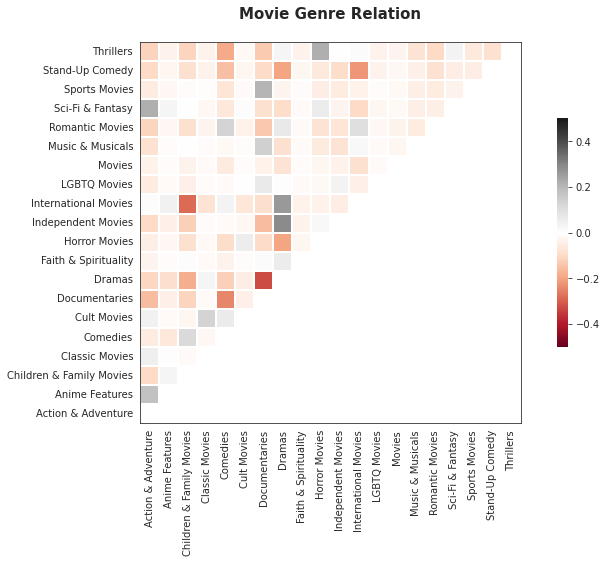

In [71]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

#prepare dataframe to plot a correlation
df = pd.DataFrame(mlb.fit_transform(genre_movies), columns=mlb.classes_, index=genre_movies.index)
corr = df.corr()

#change matrix shape
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #.triu() is a method in NumPy that returns the lower triangle of any matrix given to it

cmap = sns.color_palette("RdGy", as_cmap=True)

sns.set_style(style='white')

plt.figure(figsize=(13,7))
plt.title('Movie Genre Relation\n', fontsize=15, fontweight='bold')

pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.6}, linewidth=1)

pl.invert_yaxis()

# make frame visible
for _, spine in pl.spines.items():
    spine.set_visible(True);

In [72]:
amazon_prime[amazon_prime.type == 'Movie'].duration.head()

0      90
6      91
7     125
9     104
12    127
Name: duration, dtype: int64

***Mean for duration of Movies***

In [73]:
amazon_prime[amazon_prime.type == 'Movie'].duration.mean()

99.57718668407311

***Median for duration of Movies***

In [74]:
amazon_prime[amazon_prime.type == 'Movie'].duration.median()

98.0

In [75]:
duration_by_year = amazon_prime[amazon_prime.type == 'Movie'][['duration', 'release_year']]
duration_by_year

,duration,release_year
0,90,2020
6,91,2021
7,125,1993
9,104,2021
12,127,2021
...,...,...
8801,96,2015
8802,158,2007
8804,88,2009
8805,88,2006


***Visualizing the relation between the movie duration and release year***

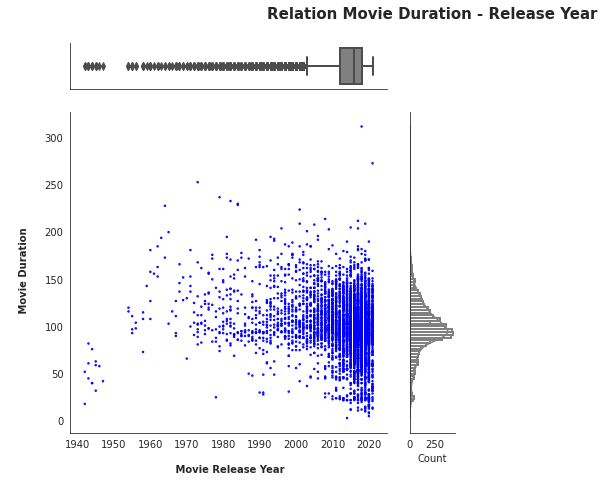

In [76]:
sns.set_style(style='white')

g = sns.JointGrid(marginal_ticks=True, space=0.5, palette='RdGy')
x, y = duration_by_year.release_year, duration_by_year.duration
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=1, linewidth=1.5, ax=g.ax_joint) #marginal_ticks=True)
sns.histplot(y=y, fill=False, linewidth=2, ax=g.ax_marg_y, kde=True, color = 'grey')
sns.boxplot(x=x, linewidth=2, ax=g.ax_marg_x, color='grey')

g.ax_joint.set_xlabel('\n Movie Release Year\n', fontweight='bold')
g.ax_joint.set_ylabel('\n Movie Duration\n', fontweight='bold')

g.ax_marg_x.get_yticklabels()
g.ax_marg_y.get_xticklabels()

plt.title('Relation Movie Duration - Release Year\n\n\n\n\n', fontsize=15, fontweight='bold');

***Visualizing duration of TV Shows***

In [77]:
df_9 = amazon_prime.query("type == 'TV Show'")
df_9 = df_9[[ "title", "duration"]]
df_9 = df_9.groupby(['duration'])["title"].count().reset_index().sort_values('title', ascending = False)
df_9 = df_9.rename(columns = {"title": "TV Shows", "duration" : "Seasons"})

fig_show = px.bar(df_9, x='Seasons', y='TV Shows', color_discrete_sequence=['Red'], 
                  title='TV Shows seasons ')
fig_show.show()

***Word Cloud for Movie Titles***

Text(0.5, 1.0, 'KEY WORDS IN MOVIE TITLES\n')

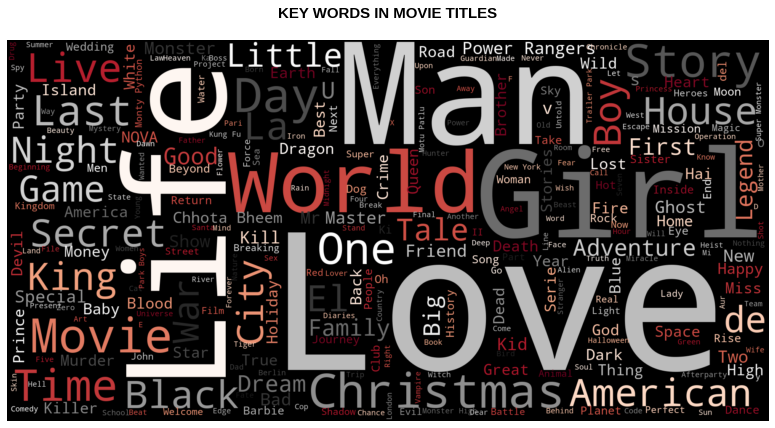

In [78]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

plt.style.use('seaborn')

from PIL import Image

words = amazon_prime["title"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="RdGy",background_color="black").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("KEY WORDS IN MOVIE TITLES\n",color='black',fontsize=15, fontweight='bold')


***Word cloud for Directors***

Text(0.5, 1.0, 'KEY WORDS IN DIRECTORS \n')

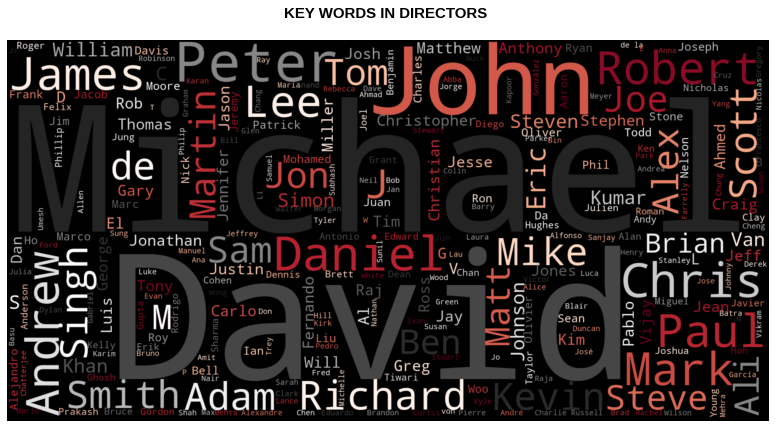

In [79]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

plt.style.use('seaborn')

from PIL import Image

words = amazon_prime["director"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="RdGy",background_color="black").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("KEY WORDS IN DIRECTORS \n",color='black',fontsize=15, fontweight='bold')



In [80]:
small = amazon_prime[amazon_prime["type"] == "Movie"]
small = small[small["country"] == "India"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="pink"))

data = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


***Word Cloud for cast***

Text(0.5, 1.0, 'KEY WORDS IN CAST \n')

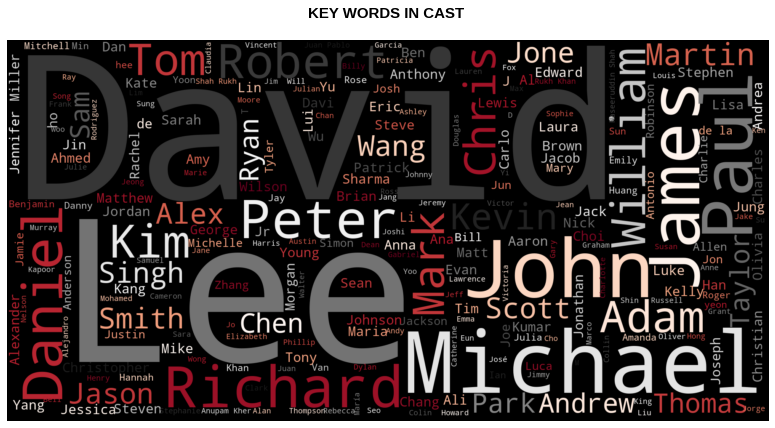

In [81]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

plt.style.use('seaborn')

from PIL import Image

words = amazon_prime["cast"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="RdGy",background_color="black").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("KEY WORDS IN CAST \n",color='black',fontsize=15, fontweight='bold')


***Tops actors with most movies in top 3 countries***

In [82]:

from collections import Counter
def country_trace(country, flag = "movie"):
    amazon_prime["from_us"] = amazon_prime['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = amazon_prime[amazon_prime["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "France"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)


fig.update_layout(height=1200, showlegend=False)
fig.show()